In [60]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import scipy
import math
import collections
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# utils
from utils import cleaning, config, eda

# params
plt_params = {'axes.labelsize': 16}
plt.rcParams.update(plt_params)

In [61]:
# Load data and start formatting
sci_raw = cleaning.load_data(config.DB_SCI_PATH)

# Format column name and change index
sci = sci_raw.copy()
sci = sci.drop('SmartCity_Index_relative_Edmonton', axis=1)
sci = cleaning.format_data(sci)

display(eda.report(sci))
display(sci.head())

,nan_count,dtype,unique
city,0,object,102
country,0,object,36
smart_mobility,0,int64,100
smart_environment,0,int64,98
smart_government,0,int64,98
smart_economy,0,int64,99
smart_people,0,int64,98
smart_living,0,int64,38
smartcity_index,0,int64,100


,city,country,smart_mobility,smart_environment,smart_government,smart_economy,smart_people,smart_living,smartcity_index
id,,,,,,,,,
1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138
2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296
3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311
4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171
5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812


In [62]:
# Dataset statistics

sci.describe().round(1)

,smart_mobility,smart_environment,smart_government,smart_economy,smart_people,smart_living,smartcity_index
count,102.0,102.0,102.0,102.0,102.0,102.0,102.0
mean,5759.4,5943.5,5893.8,6131.8,5874.0,6377.0,5991.9
std,1214.0,1724.0,1153.4,1801.6,1449.1,2286.4,852.8
min,3175.0,1850.0,2806.0,1490.0,2825.0,1980.0,4191.0
25%,4809.8,4530.5,5143.0,5007.5,4724.8,4385.0,5366.2
50%,5651.5,6495.0,5911.0,6432.5,5747.5,6485.0,6261.5
75%,6763.8,7310.0,6581.5,7492.5,7061.2,8710.0,6672.5
max,8110.0,8844.0,8726.0,9225.0,9695.0,10000.0,7353.0


In [63]:
# What are the mean Smart City Indexes for each country ?
cols = ['smart_mobility', 'smart_environment',
       'smart_government', 'smart_economy', 'smart_people', 'smart_living',
       'smartcity_index']

mean_sci = pd.DataFrame(sci.groupby('country')[cols].mean()).astype('int64')
mean_sci = mean_sci.sort_values('smartcity_index', ascending=False)
mean_sci.style.background_gradient(cmap='YlOrRd')


,smart_mobility,smart_environment,smart_government,smart_economy,smart_people,smart_living,smartcity_index
country,,,,,,,
Netherlands,7540,5558,8528,8095,7098,7280,7311
Norway,6346,6913,7038,4943,7955,9090,7072
Canada,6585,4765,6566,6629,7112,9413,6898
Singapore,5790,4344,5560,5535,9695,10000,6813
Denmark,6205,8184,7595,5135,6377,7200,6776
Austria,5683,7608,6232,5415,8580,7500,6771
Switzerland,5326,8775,5591,6265,6425,7960,6707
Sweden,5127,8100,7863,5518,6132,7730,6658
Finland,4912,6535,6148,8055,5980,8710,6643


Text(0.5, 1.0, 'Smart City Index per country, ordered')

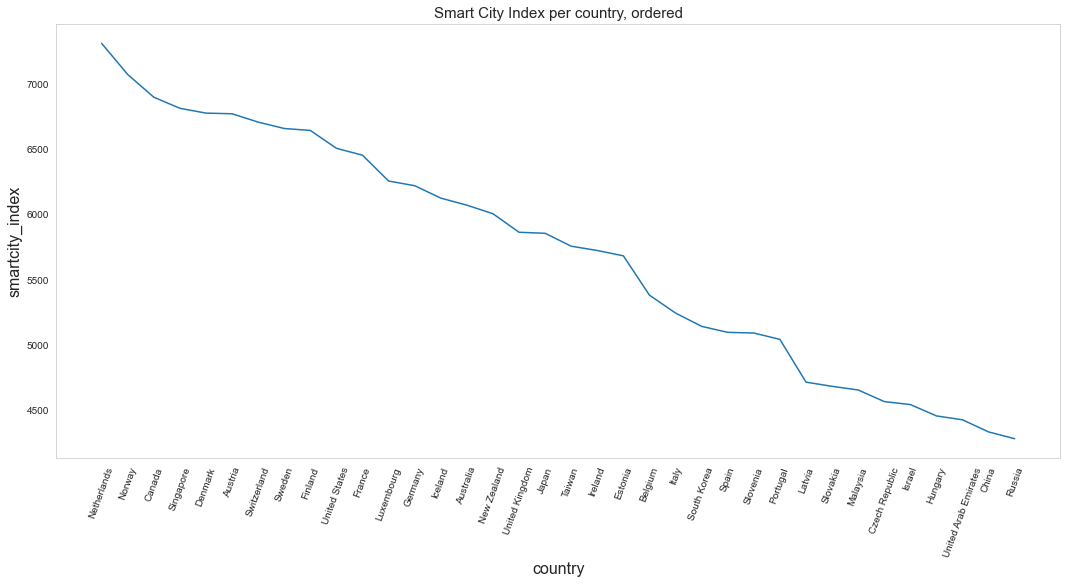

In [69]:

plt.figure(figsize=(18, 8))
plt.xticks(rotation=70)
plt.grid()
sns.lineplot(x = mean_sci.index, y=mean_sci.smartcity_index)
plt.title('Smart City Index per country, ordered', fontsize = 15)


Text(0.5, 1.0, 'Boxplot of Smart City Subindexes')

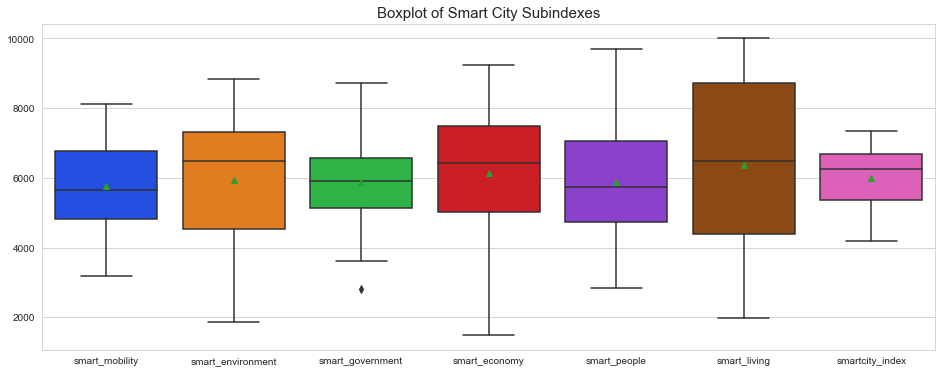

In [66]:
#Closer look at normal distribution patterns in a Boxplot.

plt.figure(figsize=(16,6))
sns.boxplot(data=sci, showmeans=True, palette='bright')
plt.title('Boxplot of Smart City Subindexes', fontsize = 15)

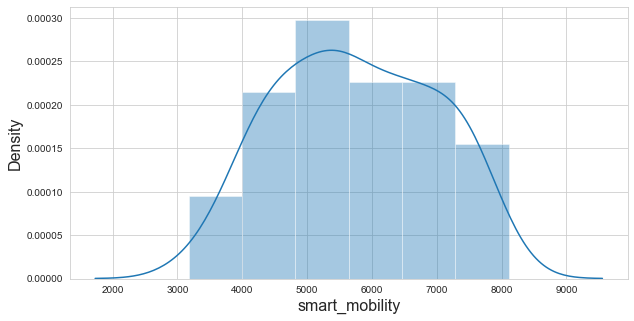

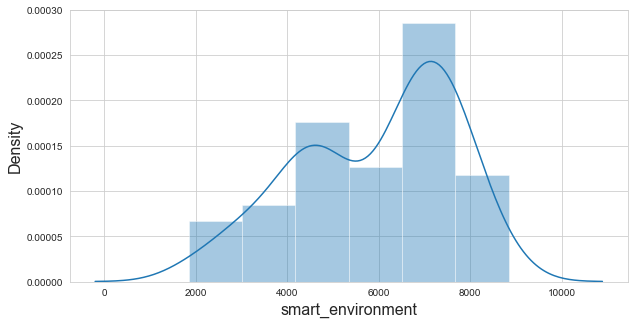

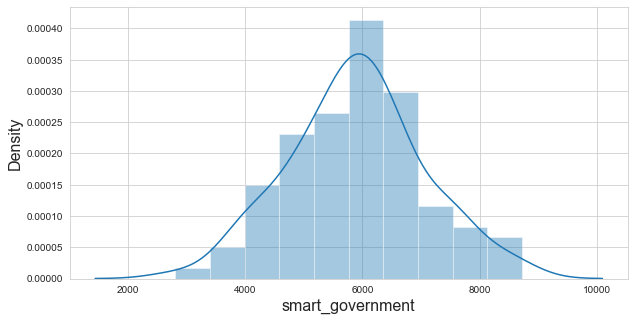

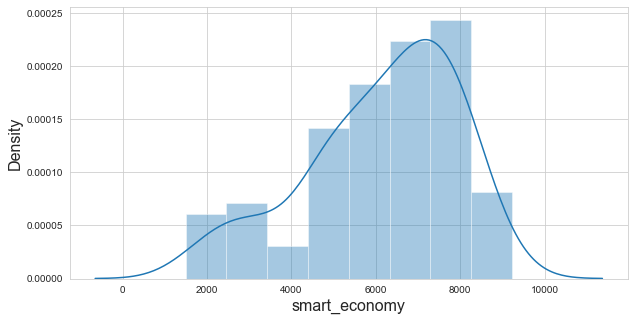

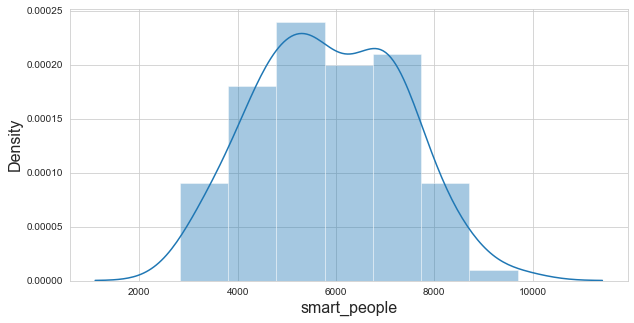

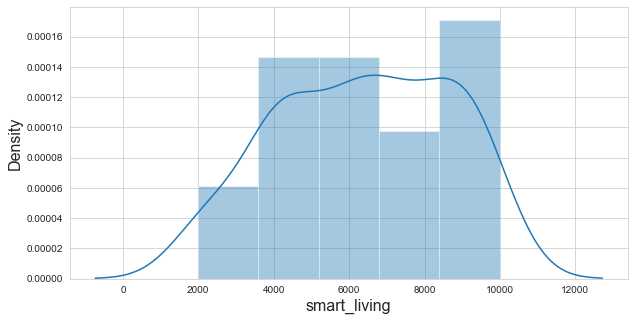

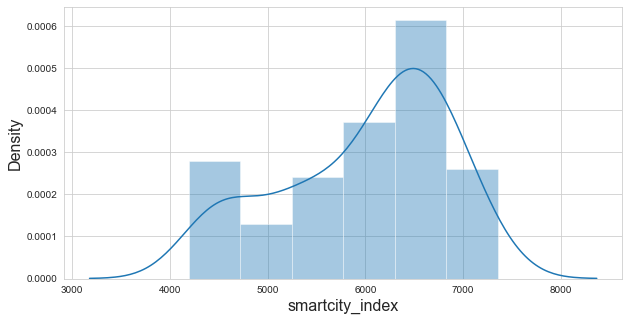

In [79]:
eda.plot_distributions(sci.select_dtypes(np.number), figsize=(10, 5))

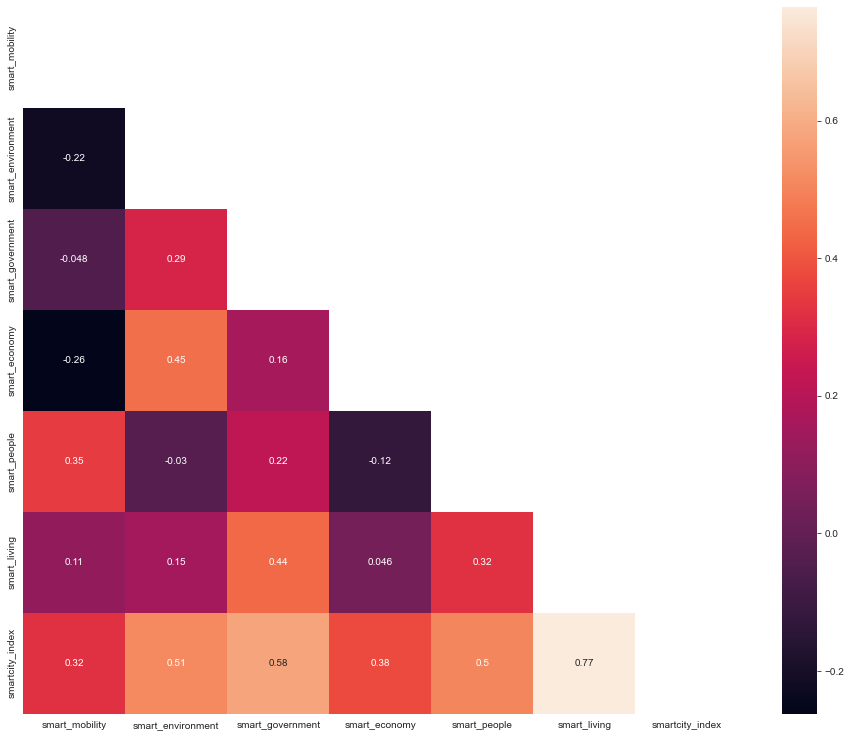

In [72]:
eda.show_corr_heatmap(sci, figsize=(16, 13))

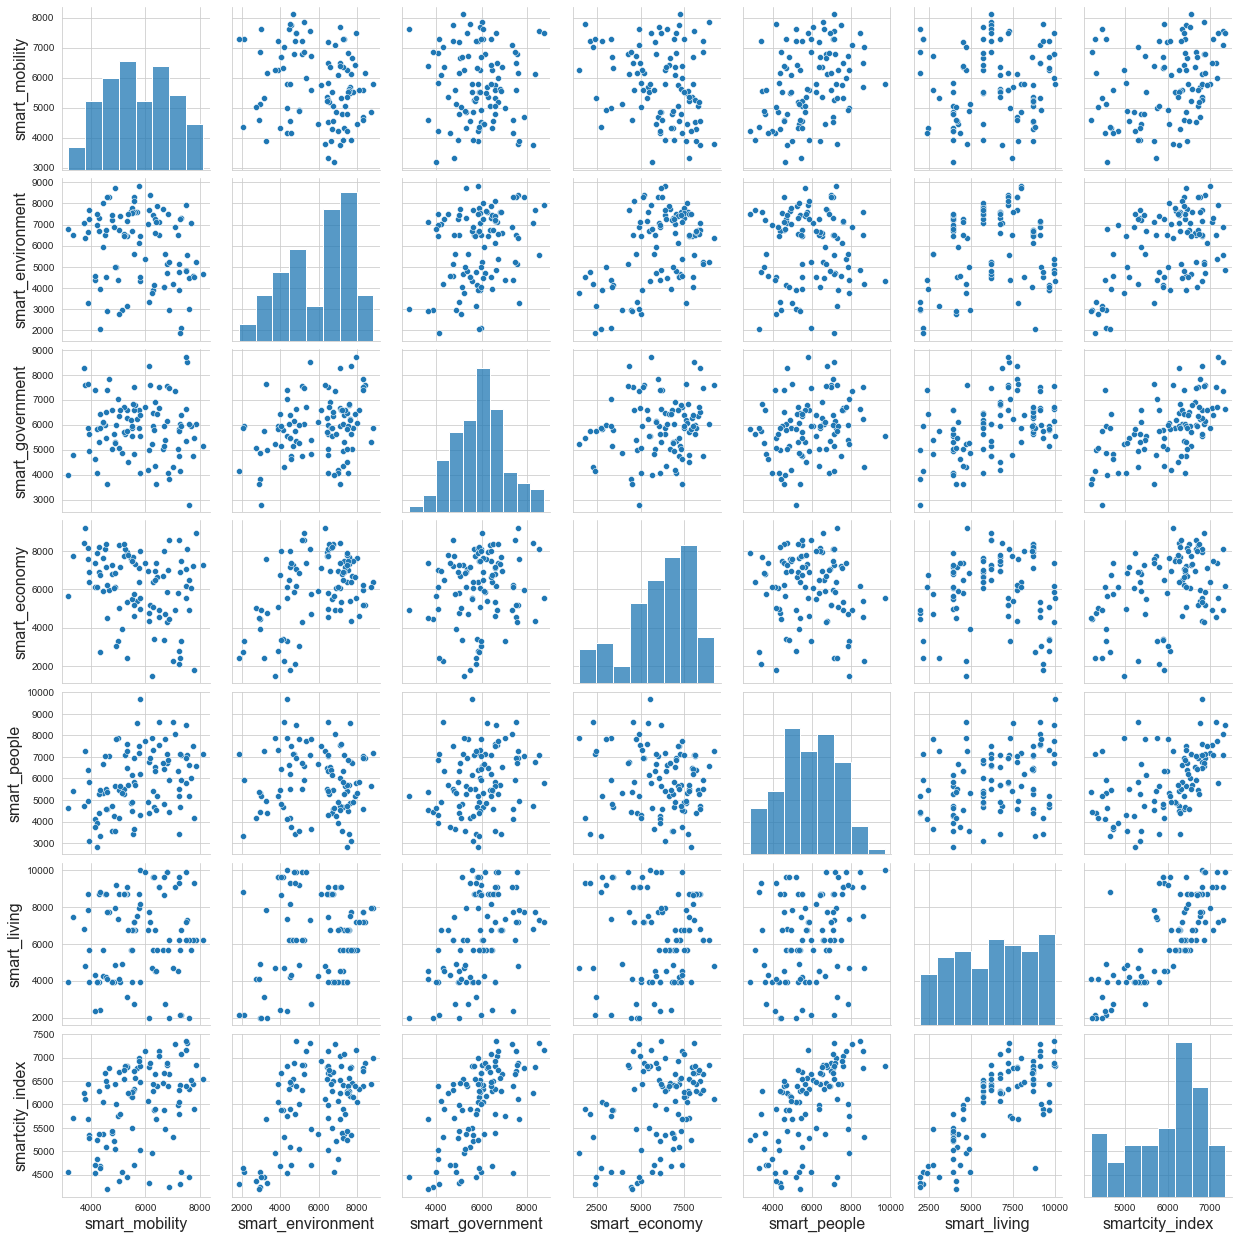

In [81]:
sns.pairplot(sci)

Population